<a href="https://colab.research.google.com/github/JeffAirData/Dojo-IA-Scikit-Learn/blob/main/DOJO_IA_Encontro_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução



## Onde estou?
Bem-vind@ à nossa primeira aula do nosso DOJO de IA, executada inteiramente dentro de um caderno do Google Colab. Esta é essencialmente uma página normal da web com uma interpretador _Javascript_ para apresentação e edição e um interpretador Python rodando em uma máquina virtual Linux.

Conseguimos criar células de texto, como esta!

In [ ]:
# Ou células de código Python, como essa
2+2
print("Olá mundo!")

Olá mundo!


## Para onde vou?

Você pode criar novas células clicando ali no topo da página nos botões `+ Code` ou `+ Text`. Se você passar o cursor do _mouse_ por cima desta célula _mais ou menos_ no meio desta célula os botões também aparecerão. Muito simples, certo?

#### **Questão 1**: Qual o atalho do teclado para criar uma célula de texto? E de código?

In [ ]:
# As células de texto servem para documentar o que está sendo feito.

print("E as células de código servem para executar código usando o interpretador Python embutido]

Se você já fez uma matéria de laboratório onde precisava intercalar texto e tabelas, gráficos etc., já pegou a ideia. Essa é a inspiração do [Project Jupyter](https://jupyter.org/) [1], que por sua vez é implementado de maneira quase 100% compatível pelo Colab, pelo menos para o interpretador Python.

Um clique duplo nas células de texto te permite editá-las. Você pode usar formatação em _Markdown_ com gráficos (**imagens** JPG, PNG etc.) inserir listas (não)-numeradas, _links_ etc. Temos uma boa referência para _Markdown_ em [2]

Outra possibilidade é renderizar código matemático em $\LaTeX$ usando _MathJax_. Conseguimos mostrar desde frações como $\frac{4}{2}$ até símbolos matemáticos mais sofisticados: $$\lim_{n\rightarrow\infty} P(|X_n-X|\geq \epsilon) = 0, \forall \epsilon > 0$$

Você executa a célula atual usando `SHIFT+ENTER`, para executar e criar uma nova célula a seguir caso a atual seja a última do caderno, ou `CONTROL/COMMAND+ENTER` para executar e não criar uma a seguir.

Você não precisa, mas pode instalar um ambiente com Jupyter e a maior parte dos pacotes na sua máquina com uma distribuição científica como o [Anaconda Individual Edition](https://www.anaconda.com/products/individual) [3] e similares. Mas não é necessário por ora: esta máquina virtual tem um desempenho satisfatório e nos poupa de uma série de tarefas de administração.

# Mão na massa

Vamos começar com alguns esclarecimentos:
1. Você não precisa saber matemática sofisticada para entender o que vai acontecer.
2. Você não precisa saber Python para entender o que vai acontecer.
3. Você não precisa conhecer o histórico de IA/ML para entender o que vai acontecer.
4. No final deste encontro você terá um modelo de _Machine Learning_ pronto, vai entender algumas das métricas de desempenho e problemas habituais que encontramos.
5. Você **NÃO** vai se tornar especialista em _Machine Learning_ e áreas correlatas em uma hora, uma semana, um mês ou um ano.
6. Você terá um modelo pronto, mas não pronto para **produção**, existem algumas considerações adicionais que podem ser abordadas em outro momento.
7. Este é um encontro rápido, uma apresentação breve mas (suponho) divertida de como é trabalhar em um caderno no Google Colab.
8. Temos alguns exercícios no final que podem ser feitos individualmente: eles esclarecem alguns conceitos-chave. Você pode me procurar a qualquer momento via _e-mail_ <augusto.nunes@cg.df.gov.br> ou _Whatsapp_, _Telegram_, _Signal_ e similares em +556192580865
9. Este DOJO foi montado em cima de uma biblioteca chamada [scikit-learn](https://scikit-learn.com) [5]. Ela não é a única biblioteca de ML para Python, mas é certamente a melhor para arquiteturas tradicionais de ML. Sua documentação é extensa e acompanha inúmeros exemplos. O Colab roda a versão 0.22.2 da biblioteca no momento da criação desse curso, mas a versão estável ATM é a 0.24.1.


## Problema: Identificação de dígitos escritos à mão

### **Contexto**:
_Há muito tempo atrás_, todo tipo de informação era anotada à mão. Aí cada pessoa, com seu estilo de escrita, com aquela caneta que está falhando, com pressa, em movimento etc. escreve de um jeito.

Também láááá atrás começaram a surgir máquinas capazes de tarefas de reconhecimento óptico eficientes, que poderiam garantir ganhos onde até então teríamos que contar com a inspeção visual de pessoas.

Uma destas tarefas era a tabulação do Censo Demográfico dos EUA: até então os recenseadores anotavam os dados dos domicílios e seus residentes em imensos formulários de papel, e essas anotações estavam sujeitas a todas as limitações que elencamos acima.

O _Bureau_ do Censo dos EUA tinha um grande volume de dados _mais ou menos_ estruturados e um problema bem definido: como fazer com que essa tarefa de identificação dos dígitos (não apenas) escritos à mão fosse feita a contento por uma máquina?

Em 1998, _LeCun et al._ publicaram um artigo [7] onde aplicaram algumas técnicas a este conjunto de dados disponibilizado pelo _National Institute of Standards and Technology_ norte-americano.


#### **Questão 2**: Como você imagina que essas técnicas foram avaliadas? Não precisa consultar o artigo, pode usar a imaginação.

#### **Questão 3**: Como você estudava para suas provas na faculdade?

#### **Questão 4**: Como os professores corrigem provas?




Importando as bibliotecas e o banco de dados:

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

***Inspecionando*** os dados:

In [ ]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
X[2020]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 167., 208.,  19.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  13., 235., 254.,
        99.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  74., 254., 234.,   4.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

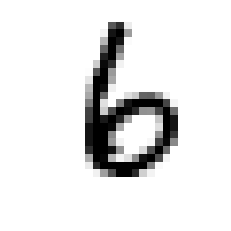

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

digito = X[2020]
imagem_digito = digito.reshape(28, 28)

plt.imshow(imagem_digito, cmap='binary')
plt.axis("off")
plt.show()

#### Questão 5: Como saber a qual número corresponde a imagem que obtivemos acima?

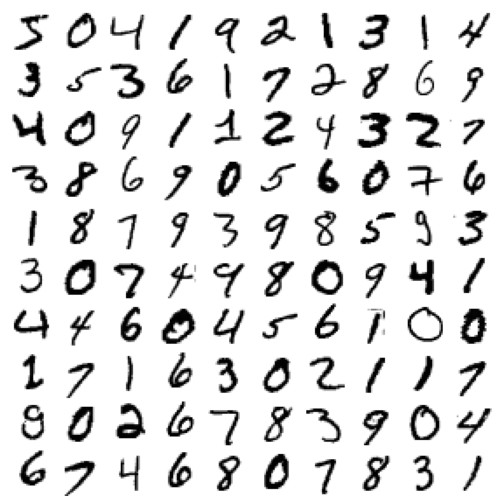

In [ ]:
# Fonte: Hands-on Machine Learning: capítulo 3
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()


In [ ]:
y = y.astype(np.uint8)

De maneira geral fazemos uma divisão dos dados:

* Conjuntos de treinamento (**train**): é a partir destes conjuntos que os modelos são construídos. No nosso exemplo: cada uma das observações, instâncias (_et cetera_) de `X_train` corresponde a um número - na verdade, a uma representação numérica da representação imagética de um número; similarmente, cada respectiva observação de `y_train` é o rótulo, a classe, a categoria (_et cetera_) do número.
* Conjuntos de teste (**test**): é o conjunto sobre o qual avaliamos o desempenho do modelo. O modelo _aprende_ usando os conjuntos de treinamento, e é avaliado sob a perspectiva do conjunto de teste.

#### Questão 6: O que acontece se os conjuntos de treinamento e teste forem similares?

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### Questão 7: É suficiente avaliar a performance apenas treinando e em seguida considerando o conjunto de teste? Dica: esta resposta tem relação com a anterior.

Que tal começarmos com um problema um pouco menor? Do ponto de vista do problema em si não faz muito sentido o interesse em apenas identificar se a imagem corresponde a um dígito específico ou não, mas isso vai nos ajudar a entendermos como treinar e avaliar um modelo.

In [ ]:
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

In [ ]:
y_train_6

array([False, False, False, ..., False,  True, False])

Vamos começar com uma arquitetura simples também. A classe `SGDClassifier` [8] implementa diversos classificadores lineares.

O que é um classificador linear? O excelente canal "Programação Dinâmica" no _Youtube_ traz uma ótima explicação de um classificador linear em [CLASSIFICAÇÃO com Máquinas de Vetores de Suporte (SVM) | Machine Learning #05](https://www.youtube.com/watch?v=ba7tMJZbGyA) [9]. Resumindo em uma frase: são modelos simples, cujo tempo de _treinamento_ é curto o suficiente para que sirvam de base de desempenho para modelos mais sofisticados.



In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
%%time

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_6)

CPU times: user 12.7 s, sys: 2 ms, total: 12.7 s
Wall time: 12.7 s


#### Questão 8: O que acabou de acontecer???

In [ ]:
sgd_clf.predict([X[21]])

array([False])

# Avaliação!

In [ ]:
sgd_clf.score(X_test, y_test_6)

0.9715

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_6, cv=3, scoring="accuracy")

array([0.9829 , 0.98025, 0.9804 ])

Uau! 0,97; 0,98 de acurácia, nada mal!

Uma avaliação que fazemos habitualmente é a seguinte: o meu modelo é mais competente que um modelo _"burro"_? Por _burro_ quero dizer um modelo que sempre prevê a classe mais prevalente, ou que escolhe a mesma classe sempre, etc.?

In [ ]:
from sklearn.base import BaseEstimator

class ClassificadorNunca6(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [ ]:
nunca_6_clf = ClassificadorNunca6()

cross_val_score(nunca_6_clf, X_train, y_train_6, cv=3, scoring="accuracy")

array([0.90145, 0.8998 , 0.90285])

Ufa, nosso estimador é sim melhor que um estimador burro que considera que nenhuma imagem representa o dígito 6.

Estabelecemos duas coisas, a partir de um estimador linear simples e que foi treinado em alguns segundos:

* Nosso modelo é melhor que um estimador _burro_
* Nosso modelo é ~8% melhor que um estimador burro.

Mas só isso não basta.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3)

In [ ]:
y_train_pred

array([False, False, False, ..., False,  True, False])

A **matriz de confusão** veio para desconfundir! Eu te falei lá em cima que não precisaríamos de matemática sofisticada, certo? Uma matriz é uma representação matemática simples.

Você tem linhas e colunas, e cada interseção entre uma linha e uma coluna é uma entrada da matriz. Simples, né?

Em particular para a nossa **matriz de confusão**:
* Cada **linha** da matriz corresponde ao rótulo verdadeiro dos dados.
* Cada **coluna** da matriz corresponde ao rótulo predito pelo nosso modelo.
* Cada **entrada** da matriz conta quantas observações estão naquela combinação de rótulo verdadeiro _versus_ predito.

In [ ]:
from sklearn.metrics import confusion_matrix

mc = confusion_matrix(y_train_6, y_train_pred)
print(mc)

[[53562   520]
 [  609  5309]]


Para o nosso subproblema didático, a primeira linha e a primeira coluna representam o valor lógico `False`, a classe _negativa_ da predição binária, ou seja, imagens que não são `6`. Já a segunda linha, os rótulos positivos, ou seja, imagens que representam o dígito `6`.


Avançando na **avaliação**: precisamos falar de duas métricas essenciais obtidas a partir de matriz de confusão. São métricas mais concisas e que serão de grande utilidade quando não tivermos uma ou duas classes, mas sim 10, 100 ou 1000.

**Precisão** é a capacidade do modelo estar certo quando ele prevê uma classe. O nosso modelo previu *corretamente* a classe, i.e. acertou que o dígito representado pela imagem é `6`, em 5309/(5309+520) = ~91% das vezes.

**Recall** (também chamado de especificidade ou _True Positive Rate_ é a capacidade do modelo detectar todos os objetos das classes no modelo. Para o nosso modelo, o _recall_ foi 5309/(5309+609) = ~89% das vezes

#### Questão 9: Como "construir" um modelo com precisão e recall perfeito?

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_6, y_train_pred), recall_score(y_train_6, y_train_pred)

(0.9107908732201063, 0.8970936127069956)

Indo além, usualmente olhamos para o `escore F1` de um estimador. Ele é uma média harmônica entre a precisão e o recall.


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_6, y_train_pred)

0.9038903549842513

O `f1_score` é útil pois existe um _trade off_ entre a precisão e o _recall_. Ou seja, a não ser que utilizemos um modelo como o da Questão 8, sempre teremos um classificador que pode ser melhorado em uma direção ou outra a partir de um certo equilíbrio. O `f1_score` favorece modelos "equilibrados", onde a precisão e o _recall_ são similares. Pode não ser o caso do seu problema, vamos avaliar isso a seguir.

A explicação desse fenômeno varia um pouco de modelo para modelo. Para o caso do `SGDClassifier` que consideramos, que é essencialmente uma Máquina de Vetor de Suporte, temos o seguinte: quando nós rodamos o treinamento do modelo ele nos retorna uma função de decisão. Cada vez que usamos o método `predict` desse modelo, o modelo utiliza os valores do vetor `X` como argumentos dessa função e recebe um valor. Se esse valor foi maior que um _limiar_ (no jargão é comum falar em _threshold_), ele assinala a observação/instância para a classe positiva; e caso contrário, para a classe negativa.

Vamos exemplificar:

In [ ]:
y_scores = sgd_clf.decision_function([digito])
y_scores

array([1536.33884755])

In [ ]:
limiar = 0
y_digito_pred = (y_scores > limiar)
y_digito_pred

array([ True])

In [ ]:
limiar = 8000

y_digito_pred = (y_scores > limiar)

y_digito_pred

array([False])

In [ ]:
%%time
y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3, method="decision_function")

CPU times: user 30 s, sys: 267 ms, total: 30.3 s
Wall time: 29.9 s


In [ ]:
y_scores

array([-39614.11280861, -23000.60813222, -51005.78508536, ...,
       -62463.22334614,   7619.82763053, -48922.78263784])

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_6, y_scores)

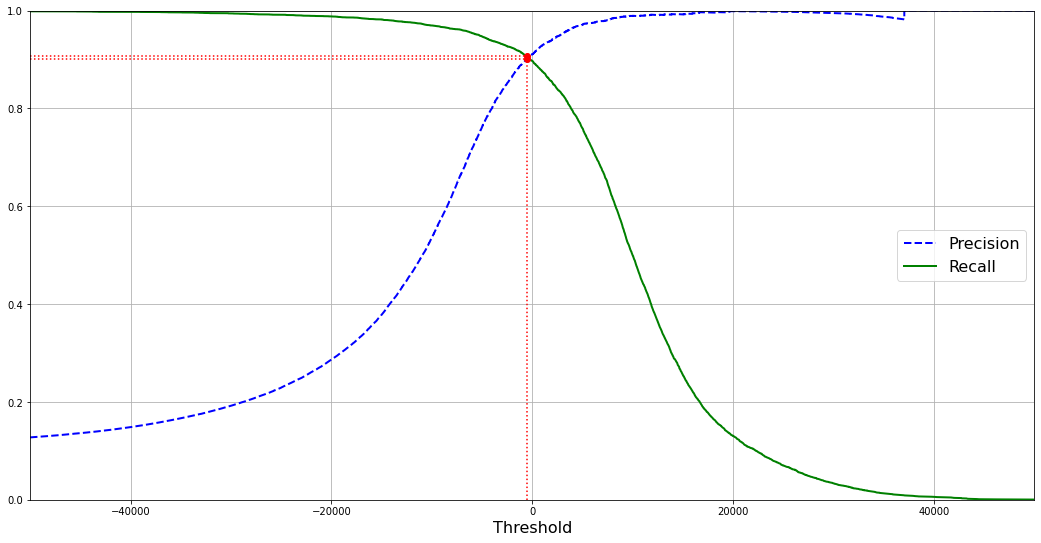

In [ ]:
# Fonte: Hands-on Machine Learning: capítulo 3
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(18, 9))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

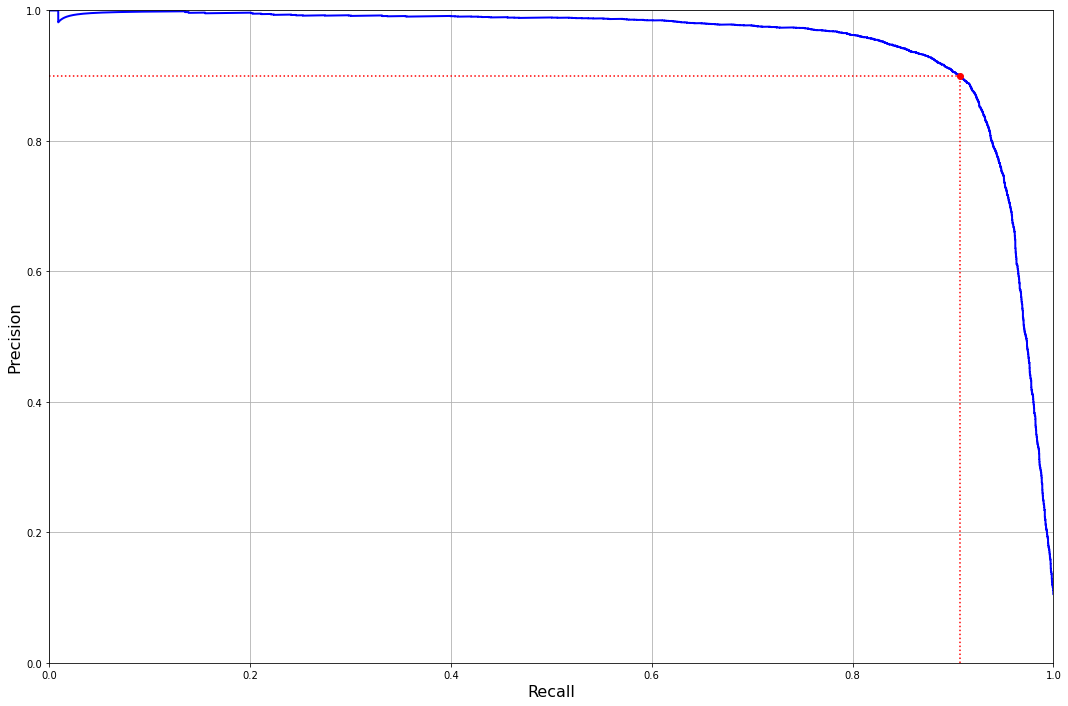

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(18, 12))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()



Acabamos de fazer um **ajuste de hiperparâmetros** do modelo, em particular um ajuste do limiar da função de decisão.

Esse _trade off_ sinaliza uma possibilidade que pode ser útil a depender da aplicação. Vamos supor que você está criando um filtro de conteúdo para vídeos infantis, e você já fez a limpeza dos dados, treinou um modelo, avaliou e agora está interessado no ajuste de hiperparâmetros. Você também lembra dessa aula, e precisa decidir se vai almejar uma precisão alta ou um _recall_ alto.

* Se tiver uma **precisão alta**: o modelo vai identificar como seguros vídeos que são de fato seguros, mas vai bloquear muitos vídeos seguros, graças ao _recall_ baixo.
* Se tiver um **recall alto**: o modelo vai considerar seguros vários vídeos que não são seguros, graças à precisão baixa.




#### Questão 10: Qual métrica do nosso filtro de conteúdo vamos favorecer a partir do ajuste do limiar da função de decisão?

Vamos melhorar a nossa prática agora, tanto modelando o problema de identificação do dígito a partir da imagem que considera as 10 classes possíveis, quanto introduzindo outra arquitetura a partir de classe `RandomForestClassifier` [10]. Temos um bom vídeo do canal Minerandodados, [Entenda o Algoritmo de Machine Learning Random Forest.](https://www.youtube.com/watch?v=jBGxiu8K11o) [11] explicando o que é uma _Random Forest_. Novamente, tentando resumir em uma frase: uma _Random Forest_ agrega vários outros modelos menos poderosos - árvores de decisão no caso - e obtém um estimador mais robusto.

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

sgd_clf = SGDClassifier(n_jobs=-1)
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


CPU times: user 37 ms, sys: 6.96 ms, total: 43.9 ms
Wall time: 149 ms


In [ ]:
%%time
sgd_clf.fit(X_train, y_train)
forest_clf.fit(X_train, y_train)

CPU times: user 4min 16s, sys: 306 ms, total: 4min 17s
Wall time: 2min 16s


In [ ]:
print("A acurácia da Máquina de Suporte de Vetor para foi de {}".format(sgd_clf.score(X_test, y_test)))
f"A acurácia da Random Forest foi de {forest_clf.score(X_test, y_test)}"

A acurácia da Máquina de Suporte de Vetor para foi de 0.8904


'A acurácia da Random Forest foi de 0.9705'

Agora nós já sabemos que a acurácia não é a única métrica de interesse para avaliar um modelo, certo? Então vamos lá.

Começando pelas matrizes de confusão:

In [ ]:
%%time
y_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
mc = confusion_matrix(y_train, y_pred_sgd)


In [ ]:
print(mc)

[[5643    1   24   19   13   37   45    9  122   10]
 [   4 6497   57   24   13   31    4   11   90   11]
 [  50  109 4967  126   91   36  115   91  353   20]
 [  35   47  144 5090   19  345   41   69  270   71]
 [  17   25   43   12 5279   16   43   22  176  209]
 [  84   33   40  192   97 4217  148   28  489   93]
 [  56   15   78   10   57  101 5511    3   84    3]
 [  20   23   47   49   79   22    3 5705  105  212]
 [  37  143   83  157   45  201   35   23 4986  141]
 [  24   25   28  103  262   94    5  269  509 4630]]


Aqui a matriz de confusão já fica meio confusa, né? Uma outra técnica é avaliar uma representação da matriz:

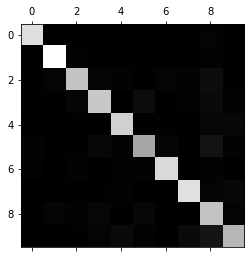

<Figure size 720x576 with 0 Axes>

In [ ]:
plt.matshow(mc, cmap=plt.cm.gray)
plt.figure(figsize=(10, 8))
plt.show()

Hm, ainda não dá pra deduzir muita coisa, né? Nós pulamos uma etapa aqui nesse caderno e esse pulo foi intencional e educativo: **NUNCA COMECE A CONSTRUIR UM MODELO DE MACHINE LEARNING SEM FAZER UMA ANÁLISE EXPLORATÓRIA DOS DADOS**.

Aqui o que pega é o seguinte: as classes não estão balanceadas. Como saber?

In [ ]:
import pandas as pd

pd.DataFrame(y).value_counts(normalize=True)

1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
dtype: float64

A `pandas` é verdadeiramente uma biblioteca "coringa" em Python. A gente consegue fazer ingestão, transformação, análise exploratória, carga de dados, quase tudo apenas usando pandas. Aí em cima utilizamos o método `value_counts` aplicado à classe `DataFrame`, passando o parâmetro `normalize`.

No fim das contas: agora sabemos que temos cerca de 11,25% de observações na classe `1`, 10,42% na classe `7`, etc.

Voltando então pra nossa matriz de confusão: como as classes não contém todas o mesmo número de observações para cada uma das classes, pode ser que na nossa representação acima os tons escuros e claros não reflitam fielmente o que está acontecendo.

Para contornar isso, vamos "normalizar" a matriz de confusão. Ao invés das entradas representarem a contagem de observações reais _versus_ previstas, elas vão representar uma razão de observações reais _versus_ previstas: 0 caso o modelo não tenha previsto nenhuma observação para aquela combinação, e 1 caso tenha previsto todas as obervações para aquela combinação:


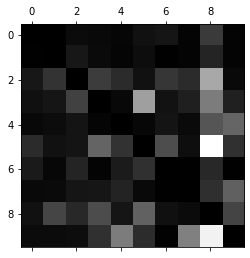

In [ ]:
row_sums = mc.sum(axis=1, keepdims=True)
norm_conf_mx = mc / row_sums
np.fill_diagonal(norm_conf_mx, 0) # Por quê?b
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

E aí, agora ficou muito mais claro quais classes são mais problemáticas, certo? Dá pra ver que temos muitas classificações incorretas como `8`, em particular para `8` _versus_ `5` e `8` _versus_ `9`.

Uma análise posterior seria plotar esses rótulos incorretos e avaliar através do ajuste de hiperparâmetros da Máquina de Suporte de Vetor como reduzir esse erro específico à predição da classe `8`. Entenda que as interpretações das métricas e gráficos que fizemos para o caso dicotômico ainda valem, porém com uma certa sofisticação.

Você pode brincar linda e livremente a partir daqui! Tudo que fizemos acima está disponível. Estes cadernos do Google Colab eventualmente expiram, mas isso nunca aconteceu comigo durante a edição de um caderno e com problemas que não demandam muita capacidade de processamento.

Coloquei um exercício a seguir que é não é um salto muito grande de dificuldade para o que já fizemos mas julguei ser adequado ao público e à proposta. O ciclo à seguir é o "arroz com feijão" para problemas de ML, isso vistos apenas do ponto de vista técnico, sem considerar a extensa e necessária obtenção de requisitos junto à área de negócio:

1. Obter dados
2. Explorar dados
3. Limpar dados
4. Transformar dados
5. Modelar
6. Ajustar o modelo
7. Avaliar o modelo
8. Ajustar Hiperparâmetros do modelo
9. Voltar para `5`

Não é a toa que 4 dos 9 itens envolvem algo relacionado aos dados. Em exemplos didáticos é muito simples obter dados limpos e adequados, na vida real não.

# Exercício

Ali em cima nós tivemos um indício de que uma _Random Forest_ é mais eficiente que uma Máquina de Suporte de Vetor. Que tal construir as etapas subsequentes de avaliação do modelo? E um desafio: quais são os hiperparâmetros de uma _Random Forest_?


1. Grosso modo, todos os estimadores simples do `scikit-learn` seguem uma ordem de modelagem que já deve ter ficado sugerida para você.

* Você importa a classe do estimador, o que já foi feito para nós lá em cima:
```python
from sklearn.ensemble import RandomForestClassifier
```
* Você instancia a classe atribuindo um nome, o que também já foi feito:
```python
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
```

* Você chama o método `fit()` da classe, e os argumentos deste método são os conjuntos de treinamento.

2. A partir daí você tem um modelo ajustado. Você pode invocar o método `score()` (com quais argumentos?) para invocar a acurácia, por padrão, ou outras métricas de desempenho caso assim deseje. Tenha sempre a documentação do modelo aberta.

# Referências

[1] _Project Jupyter | Home_, acessado em https://jupyter.org/ às 03:34h de 07/04/2021
  * _Homepage_ do Projeto Jupyter. O Jupyter estende e muito as capacidades aqui do Colab, inclusive para interpretadores de outras linguages como R, Julia, C#, SQL etc.

[2] _Markdown Reference_, acessado em https://commonmark.org/help/ às 03:40h de 07/04/2021

[4] _Anaconda | Individual Edition_, acessado em https://www.anaconda.com/products/individual às 03:43h de 07/04/2021

[5] _scikit-learn: machine learning in Python -- scikit-learn 0.24.1 documentation_, acessado em https://scikit-learn.org/stable/ às 03:47h de 07/04/2021

[6] _MNIST handwritten digit database, Yann LeCun, Corinna Cortes and Chris Burges_, acessado em http://yann.lecun.com/exdb/mnist/ às 04:01h de 07/04/2021

[7] _Gradient-based learning applied to document recognition_, acessado em http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf às 04:05h de 07/04/2021

[8] _sklearn.linear_model.SGDClassifier — scikit-learn 0.24.1 documentation_, acessado em  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html às 05:40h de 08/04/2021

[9] _CLASSIFICAÇÃO com Máquinas de Vetores de Suporte (SVM) | Machine Learning #05_, acessado em https://www.youtube.com/watch?v=ba7tMJZbGyA às 05:42 de 08/04/2021

[10] _sklearn.ensemble.RandomForestClassifier — scikit-learn 0.24.1 documentation_, acessado em https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html às 06:20h de 08/04/2021

[11] _Entenda o Algoritmo de Machine Learning Random Forest_, acessado em https://www.youtube.com/watch?v=jBGxiu8K11o às 06:29h de 08/04/2021

# Referências adicionais


## Sites
* [Kaggle](https://kaggle.com): o Kaggle nasceu como um agregador de competições de Inteligência Artificial, com o tempo essas competições passaram a atrair grandes empresas e vultosas somas, como em 2017 quando ofereceu US$ 1 milhão para o desenvolvimento de modelos de detecção de câncer de mama a partir de exames de imagem.
* [Analytics Vidhya](https://www.analyticsvidhya.com/blog): um _blog_ muito rico que oferece artigos para os mais variados temas e técnicas de _Machine Learning_ e afim. Se você abrir o _site_ agora muito possivelmente vai achar algum artigo interessante.

## Cursos
* [Introduction to Machine Learning - Coursera](https://www.coursera.org/learn/machine-learning-duke): certificado grátis até 30 de Abril. Nome engana um pouco, apenas o primeiro curso da especialização é de fato introdutório, nos cursos subsequentes você vai estudar temas relativamente avançados.
* [Open Machine Learning Course](https://mlcourse.ai/): curso gratuito e ofertado pelo cientista de dados russo Yury Kashnitsky. Apelo forte ao embasamento matemático dos modelos e aplicação em competições do [Kaggle](https://kaggle.com), muito bom se essa é a sua aptidão.
* [fast.ai · Making neural nets uncool again](https://www.fast.ai/): alguns cursos muito bons ministrados por Rachel Thomas e Jeremy Howard. Vão desde de Ética aplicada à IA até Redes Neuras Profundas, _Deep Learning_. Uma grande comunidade, inclusive brasileira, se reúne nos fóruns e demais espaços de discussão.
* [Learn Python, Data Viz, Pandas & More | Tutorials | Kaggle](https://www.kaggle.com/learn/overview): outra excelente seleção de cursos em algumas áreas diversas relacionadas a ML.

## Livros
* [Hands–On Machine Learning with Scikit–Learn and TensorFlow 2e: Concepts, Tools, and Techniques to Build Intelligent Systems](https://github.com/ageron/handson-ml2): possivelmente o melhor livro de _Machine Learning_ que eu já li, ainda assim alguns exemplos dos capítulos finais usam uma versão defasada da biblioteca _TensorFlow_. Fuja da edição em portuguẽs.

* [Deep Learning for Coders with Fastai and PyTorch](https://github.com/fastai/fastbook): possivelmente o melhor livro sobre Redes Neurais Profundas (_Deep Learning_) que já li. Você consegue acompanhar todo o trabalho a partir do curso disponível em fast.ai e através dos cadernos disponíveis no repositório do Github.
